# 数据预处理

## 读取处理订单数据

In [1]:
import pandas as pd
# 导入订单数据。
df_order=pd.read_csv("data/orders.csv")
df_order.head()

订单编号  买家会员名      买家支付宝账号  买家应付货款  买家应付邮费  买家支付积分    总金额  返点积分  \
0  21407300627014900   1425   yorzikyA6C   58.51     0.0       0  58.51     0   
1  24270488269081200   2163  AC870BA5860   15.70     5.0       0  20.70     0   
2  21402600386365500    375  AC7574B65A0    7.90     5.0       0  12.90     0   
3  21398820349555700   2618  A807C90766A    4.81     5.0       0   9.81     0   
4  21446781606162100   2012  A505588565B   23.92     5.0       0  28.92     0   

   买家实际支付金额  买家实际支付积分  ... 是否代付 定金排名  修改后的sku 修改后的收货地址 异常信息 天猫卡券抵扣 集分宝抵扣  \
0     58.51         0  ...    否  NaN      NaN      NaN  NaN    NaN   NaN   
1     20.70         0  ...    否  NaN      NaN      NaN  NaN    NaN   NaN   
2     12.90         0  ...    否  NaN      NaN      NaN  NaN    NaN   NaN   
3      9.81         0  ...    否  NaN      NaN      NaN  NaN    NaN   NaN   
4     28.92         0  ...    否  NaN      NaN      NaN  NaN    NaN   NaN   

  是否是O2O交易 退款金额 预约门店  
0      NaN  0.0  NaN  
1      NaN  0.0  NaN  
2      NaN  0.0  NaN  
3      NaN  0.0  NaN  
4      NaN  0.0  NaN  

[5 rows x 46 columns]

In [2]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   订单编号      3989 non-null   int64  
 1   买家会员名     3989 non-null   int64  
 2   买家支付宝账号   3988 non-null   object 
 3   买家应付货款    3989 non-null   float64
 4   买家应付邮费    3989 non-null   float64
 5   买家支付积分    3989 non-null   int64  
 6   总金额       3989 non-null   float64
 7   返点积分      3989 non-null   int64  
 8   买家实际支付金额  3989 non-null   float64
 9   买家实际支付积分  3989 non-null   int64  
 10  订单状态      3989 non-null   object 
 11  买家留言      384 non-null    object 
 12  收货人姓名     3989 non-null   int64  
 13  收货地址      3989 non-null   object 
 14  运送方式      3989 non-null   object 
 15  联系电话      142 non-null    object 
 16  联系手机      3986 non-null   object 
 17  订单创建时间    3989 non-null   object 
 18  订单付款时间    3989 non-null   object 
 19  宝贝标题      3989 non-null   object 
 20  宝贝种类      3989 non-null   int6

In [3]:
# 根据业务经验先进行字段的选取，删除"买家会员名"和"买家支付宝账号"两个字段。
df_order=df_order.drop(["预约门店","买家支付宝账号"],axis=1)

In [4]:
# 查看训练集中目标变量的分布信息，使用seaborn.countplot进行可视化。
# 使用shape方法查看数据集有多少个样本。
df_order.shape

(3989, 44)

In [5]:
# 使用for循环将缺失值大于80%的字段删除。
# 计算缺失值比例
missing_values = df_order.isnull().sum() / len(df_order)
display(missing_values)
# # # 筛选缺失值大于80%的字段
columns_to_drop = missing_values[missing_values > 0.8].index
display(columns_to_drop)
# # # 删除筛选出的字段
df_order.drop(columns=columns_to_drop, inplace=True)
df_order

订单编号        0.000000
买家会员名       0.000000
买家应付货款      0.000000
买家应付邮费      0.000000
买家支付积分      0.000000
总金额         0.000000
返点积分        0.000000
买家实际支付金额    0.000000
买家实际支付积分    0.000000
订单状态        0.000000
买家留言        0.903735
收货人姓名       0.000000
收货地址        0.000000
运送方式        0.000000
联系电话        0.964402
联系手机        0.000752
订单创建时间      0.000000
订单付款时间      0.000000
宝贝标题        0.000000
宝贝种类        0.000000
物流单号        0.000251
物流公司        0.000251
订单备注        0.884683
宝贝总数量       0.000000
店铺Id        0.000000
店铺名称        0.000000
订单关闭原因      0.000000
卖家服务费       0.000000
买家服务费       0.000000
发票抬头        1.000000
是否手机订单      0.065430
分阶段订单信息     1.000000
特权订金订单id    1.000000
是否上传合同照片    0.000000
是否上传小票      0.000000
是否代付        0.000000
定金排名        1.000000
修改后的sku     1.000000
修改后的收货地址    0.984708
异常信息        1.000000
天猫卡券抵扣      1.000000
集分宝抵扣       0.996992
是否是O2O交易    1.000000
退款金额        0.000000
dtype: float64

Index(['买家留言', '联系电话 ', '订单备注', '发票抬头', '分阶段订单信息', '特权订金订单id', '定金排名',
       '修改后的sku', '修改后的收货地址', '异常信息', '天猫卡券抵扣', '集分宝抵扣', '是否是O2O交易'],
      dtype='object')

订单编号  买家会员名  买家应付货款  买家应付邮费  买家支付积分     总金额  返点积分  \
0     21407300627014900   1425   58.51     0.0       0   58.51     0   
1     24270488269081200   2163   15.70     5.0       0   20.70     0   
2     21402600386365500    375    7.90     5.0       0   12.90     0   
3     21398820349555700   2618    4.81     5.0       0    9.81     0   
4     21446781606162100   2012   23.92     5.0       0   28.92     0   
...                 ...    ...     ...     ...     ...     ...   ...   
3984  11602682877778600   1175    8.70     5.0       0   13.70     0   
3985  12870990828917200    727   64.40     0.0       0   64.40     0   
3986  12870110713574600    512   99.20     0.0       0   99.20     0   
3987  11605841458021300    501   73.50     0.0       0   73.50     0   
3988  12863450268576000   2414  597.12     0.0       0  597.12     0   

      买家实际支付金额  买家实际支付积分  订单状态  ...  店铺Id 店铺名称 订单关闭原因 卖家服务费 买家服务费 是否手机订单  \
0        58.51         0  交易成功  ...     0    0  订单未关闭     0    0元    NaN   
1        20.70         0  交易成功  ...     0    0  订单未关闭     0    0元   手机订单   
2        12.90         0  交易成功  ...     0    0  订单未关闭     0    0元   手机订单   
3         9.81         0  交易成功  ...     0    0  订单未关闭     0    0元   手机订单   
4        28.92         0  交易成功  ...     0    0  订单未关闭     0    0元   手机订单   
...        ...       ...   ...  ...   ...  ...    ...   ...   ...    ...   
3984     13.70         0  交易成功  ...     0    0  订单未关闭     0    0元   手机订单   
3985     64.40         0  交易成功  ...     0    0  订单未关闭     0    0元   手机订单   
3986     99.20         0  交易成功  ...     0    0  订单未关闭     0    0元   手机订单   
3987     73.50         0  交易成功  ...     0    0  订单未关闭     0    0元   手机订单   
3988    597.12         0  交易成功  ...     0    0  订单未关闭     0    0元   手机订单   

     是否上传合同照片  是否上传小票 是否代付 退款金额  
0           否       否    否  0.0  
1           否       否    否  0.0  
2           否       否    否  0.0  
3           否       否    否  0.0  
4           否       否    否  0.0  
...       ...     ...  ...  ...  
3984        否       否    否  0.0  
3985        否       否    否  0.0  
3986        否       否    否  0.0  
3987        否       否    否  0.0  
3988        否       否    否  0.0  

[3989 rows x 31 columns]

In [6]:
# 处理后，原本46个字段，现在只剩下31个字段。
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 31 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   订单编号      3989 non-null   int64  
 1   买家会员名     3989 non-null   int64  
 2   买家应付货款    3989 non-null   float64
 3   买家应付邮费    3989 non-null   float64
 4   买家支付积分    3989 non-null   int64  
 5   总金额       3989 non-null   float64
 6   返点积分      3989 non-null   int64  
 7   买家实际支付金额  3989 non-null   float64
 8   买家实际支付积分  3989 non-null   int64  
 9   订单状态      3989 non-null   object 
 10  收货人姓名     3989 non-null   int64  
 11  收货地址      3989 non-null   object 
 12  运送方式      3989 non-null   object 
 13  联系手机      3986 non-null   object 
 14  订单创建时间    3989 non-null   object 
 15  订单付款时间    3989 non-null   object 
 16  宝贝标题      3989 non-null   object 
 17  宝贝种类      3989 non-null   int64  
 18  物流单号      3988 non-null   object 
 19  物流公司      3988 non-null   object 
 20  宝贝总数量     3989 non-null   int6

In [7]:
# 找到只表达一个信息的字段。
len(df_order.买家实际支付积分.value_counts())

1

In [8]:
# 这种只有一个信息的字段对于聚类而言并没有意义，使用for循环删除只表达一个信息的字段。
for col in df_order.columns:
    cate=len(df_order[col].value_counts())
    if cate <=1:
        del df_order[col]
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   订单编号      3989 non-null   int64  
 1   买家会员名     3989 non-null   int64  
 2   买家应付货款    3989 non-null   float64
 3   买家应付邮费    3989 non-null   float64
 4   总金额       3989 non-null   float64
 5   买家实际支付金额  3989 non-null   float64
 6   收货人姓名     3989 non-null   int64  
 7   收货地址      3989 non-null   object 
 8   联系手机      3986 non-null   object 
 9   订单创建时间    3989 non-null   object 
 10  订单付款时间    3989 non-null   object 
 11  宝贝标题      3989 non-null   object 
 12  宝贝种类      3989 non-null   int64  
 13  物流单号      3988 non-null   object 
 14  物流公司      3988 non-null   object 
 15  宝贝总数量     3989 non-null   int64  
 16  退款金额      3989 non-null   float64
dtypes: float64(5), int64(5), object(7)
memory usage: 529.9+ KB


In [9]:
# 观察退款金额的数值分布情况，发现0占了大部分。
df_order.退款金额.value_counts()

退款金额
0.00      3943
0.99         2
6.90         2
1.49         1
26.16        1
14.15        1
108.39       1
15.06        1
3.68         1
19.95        1
36.86        1
2.67         1
2.30         1
1.16         1
48.50        1
30.09        1
3.90         1
35.90        1
20.88        1
14.61        1
0.90         1
35.01        1
15.22        1
2.98         1
31.46        1
16.40        1
39.33        1
75.59        1
2.51         1
74.10        1
13.90        1
85.24        1
5.84         1
1.59         1
132.62       1
6.54         1
25.16        1
1.80         1
315.49       1
1.69         1
17.80        1
31.90        1
3.52         1
12.00        1
5.37         1
Name: count, dtype: int64

In [10]:
# 使用for循环将退款金额标签化，无退款为0，有退款为1。
df_order['退款金额']=df_order['退款金额'].apply(lambda x: 1 if x > 0 else 0)
df_order.退款金额.value_counts()

退款金额
0    3943
1      46
Name: count, dtype: int64

In [11]:
orders=df_order[['订单编号','买家会员名','买家实际支付金额','收货地址', '宝贝种类','宝贝总数量','退款金额']]
orders.head()

订单编号  买家会员名  买家实际支付金额  \
0  21407300627014900   1425     58.51   
1  24270488269081200   2163     20.70   
2  21402600386365500    375     12.90   
3  21398820349555700   2618      9.81   
4  21446781606162100   2012     28.92   

                                                收货地址  宝贝种类  宝贝总数量  退款金额  
0  广东省 广州市 越秀区 华乐街道环市东路华侨新村光明路28号3a楼（即原文化假日酒店，后易名...     5     59     0  
1        江西省 九江市 浔阳区 甘棠街道浔阳东路108号儿童保健康复中心亲子园(332000)     2      2     0  
2            浙江省 宁波市 江东区 新明街道明晨紫月227弄25号401室(315040)     1      1     0  
3               湖南省 邵阳市 其它区 湖南省邵阳市双清区铁砂岭小学后面(422000)     1      1     0  
4                   安徽省 阜阳市 颍东区 新华街道尚武艺术培训中心(236058)     1      8     0

In [12]:
orders.收货地址.values[0].split()[0]

'广东省'

In [13]:
orders.收货地址=orders.收货地址.apply(lambda x:x.split()[0])
orders.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_29568\790798599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders.收货地址=orders.收货地址.apply(lambda x:x.split()[0])


订单编号  买家会员名  买家实际支付金额 收货地址  宝贝种类  宝贝总数量  退款金额
0  21407300627014900   1425     58.51  广东省     5     59     0
1  24270488269081200   2163     20.70  江西省     2      2     0
2  21402600386365500    375     12.90  浙江省     1      1     0
3  21398820349555700   2618      9.81  湖南省     1      1     0
4  21446781606162100   2012     28.92  安徽省     1      8     0

## 读取处理订单商品数据

In [14]:
# 导入订单商品数据。
df_item=pd.read_csv("Items_order.csv")
# 观察数据。
df_item.head()

订单编号                                标题    价格  购买数量  \
0  21407300627014900     发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家  0.58    12   
1  21407300627014900          特价5号AA普通干电池 电动玩具配件 厂家直销批  1.00    20   
2  21407300627014900    大号泡泡棒沙滩小铲子工具泡泡枪公园吹泡泡户外亲子游戏玩具热卖  1.20    16   
3  21407300627014900  特价正品7号电池儿童电动玩具电源配件 厂家直销1元4节地摊货批发  1.00    10   
4  21407300627014900    儿童沙滩玩具水枪 宝宝玩水玩具户外洗澡游泳漂流戏大号水枪批发  6.79     1   

           外部系统编号                      商品属性  套餐信息   备注  订单状态            商家编码  
0  WY013-2SZD0426                   颜色分类：小号   NaN  NaN  交易成功  WY013-2SZD0426  
1       HT-5H0094                       NaN   NaN  NaN  交易成功       HT-5H0094  
2        GC018005                       NaN   NaN  NaN  交易成功        GC018005  
3       HT-7H0093                       NaN   NaN  NaN  交易成功       HT-7H0093  
4        GC080003  套餐类型：标准配置;颜色分类：33000蓝色水枪   NaN  NaN  交易成功        GC080003

In [15]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21897 entries, 0 to 21896
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单编号    21897 non-null  int64  
 1   标题      21897 non-null  object 
 2   价格      21897 non-null  float64
 3   购买数量    21897 non-null  int64  
 4   外部系统编号  21897 non-null  object 
 5   商品属性    12636 non-null  object 
 6   套餐信息    0 non-null      float64
 7   备注      130 non-null    object 
 8   订单状态    21897 non-null  object 
 9   商家编码    21897 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.7+ MB


In [16]:
# 观察商品属性的特征，从输出结果可以看到共有439个特征。
df_item.商品属性.value_counts()

商品属性
颜色分类：发光翅膀;大小描述：大号           354
颜色分类：带绳水晶球5.5CM             282
颜色分类：黑色电动枪A;大小描述：均码         221
颜色分类：398-13挖掘机              219
颜色分类：2385新款挖掘机              196
                           ... 
颜色分类：超级停车场A;套餐类型：套装礼盒+小车      1
颜色分类：梦想女孩;高度：颜色随机             1
颜色分类：迷你小厨房A;高度：颜色随机           1
颜色分类：叮叮电动车;套餐类型：套装礼盒+小车       1
颜色分类：拉线响铃坦克                   1
Name: count, Length: 439, dtype: int64

In [17]:
# 观察套餐信息的特征，从输出结果可以看到这是一个空字段。
df_item.套餐信息.value_counts()

Series([], Name: count, dtype: int64)

In [18]:
# 通过观察后，确定可用的字段为'订单编号','标题','价格','购买数量'，这些字段的信息完整
items=df_item[['订单编号','标题','价格','购买数量']]
items.head()

订单编号                                标题    价格  购买数量
0  21407300627014900     发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家  0.58    12
1  21407300627014900          特价5号AA普通干电池 电动玩具配件 厂家直销批  1.00    20
2  21407300627014900    大号泡泡棒沙滩小铲子工具泡泡枪公园吹泡泡户外亲子游戏玩具热卖  1.20    16
3  21407300627014900  特价正品7号电池儿童电动玩具电源配件 厂家直销1元4节地摊货批发  1.00    10
4  21407300627014900    儿童沙滩玩具水枪 宝宝玩水玩具户外洗澡游泳漂流戏大号水枪批发  6.79     1

## 读取处理商品数据

In [19]:
# 导入商品信息。
df_attr=pd.read_csv("Items_attribute.csv",encoding='gb2312')
df_attr.head()

宝贝ID                                标题    价格  玩具类型  \
0  537396783238    创意新款回力小车惯性坦克 军事儿童玩具模型地摊货源玩具车批发  8.90  塑胶玩具   
1   36286235128  2017热卖大号仿真惯性挖土机儿童益智礼品创意义乌地摊货玩具批发  3.90  其它玩具   
2   35722000205    创意发光球闪光透明发光水晶弹力球儿童小玩具 夜市地摊货源批发  1.65  其它玩具   
3  550659732532    新款创意六一儿童节礼物音乐投影电动枪夜市地摊货源批发男孩玩具  9.90  其它玩具   
4  531877266868   发条玩具批发上链卡通动物青蛙儿童礼物宝宝玩具经典80后益智地摊  1.85  其它玩具   

                                       适用年龄  品牌  
0                               3岁,4岁,5岁,6岁   3  
1                               3岁,4岁,5岁,6岁   3  
2          3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁   3  
3  3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁   3  
4                                     3岁,4岁   3

In [20]:
df_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   宝贝ID    288 non-null    int64  
 1   标题      288 non-null    object 
 2   价格      288 non-null    float64
 3   玩具类型    252 non-null    object 
 4   适用年龄    284 non-null    object 
 5   品牌      288 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 13.6+ KB


In [21]:
# 这个数据集包含6个字段，其中玩具类型和适用年龄存在缺失值。
# 观察玩具类型的特征，发现这个字段的特征集中在其它玩具，这个特征没有分析价值。
df_attr.玩具类型.value_counts()

玩具类型
其它玩具       165
塑胶玩具        27
其他          24
电玩具         11
仿真生活家电       9
普通娃娃         5
拼搭积木         3
单杆手推玩具       2
发泄           1
娃娃玩具         1
陀螺           1
仿真医生玩具       1
仿真房间/家具      1
仿真厨房类        1
Name: count, dtype: int64

In [22]:
# 观察适用年龄的特征，这个特征可以提取出玩具对应的适用儿童类型。
df_attr.适用年龄.value_counts()

适用年龄
3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁             54
3岁,4岁,5岁,6岁                                          36
3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁                     36
2岁,3岁,4岁,5岁,6岁                                       30
3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁                             19
3岁,4岁,5岁,6岁,7岁,8岁                                    16
3岁,4岁,5岁,6岁,7岁,8岁,9岁                                 11
3岁,4岁,5岁                                             11
3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁                  7
3岁,4岁,5岁,6岁,7岁                                        6
3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁                          5
2岁,3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁           4
2岁,3岁,4岁,5岁,6岁,7岁,8岁,9岁                               3
3个月,6个月,12个月,18个月                                     3
12个月,18个月,2岁,3岁,4岁,5岁,6岁                              3
2岁,3岁,4岁,5岁,6岁,7岁,8岁                                  3
2岁,3岁,4岁,5岁                                           3
3个月,6个月,12个月,18个月,2岁,3岁                    

In [23]:
# 提取标题和适用年龄两个字段。
attrs=df_attr[['标题','适用年龄']]
# 观察适用年龄字段的缺失值，只有4个缺失值。
attrs.适用年龄.isnull().value_counts()

适用年龄
False    284
True       4
Name: count, dtype: int64

In [24]:
# 将缺失值替换为missing。
attrs['适用年龄'].fillna('missing', inplace=True)
attrs.适用年龄.value_counts()

C:\Users\HP\AppData\Local\Temp\ipykernel_29568\2519197175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrs['适用年龄'].fillna('missing', inplace=True)


适用年龄
3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁             54
3岁,4岁,5岁,6岁                                          36
3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁                     36
2岁,3岁,4岁,5岁,6岁                                       30
3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁                             19
3岁,4岁,5岁,6岁,7岁,8岁                                    16
3岁,4岁,5岁                                             11
3岁,4岁,5岁,6岁,7岁,8岁,9岁                                 11
3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁                  7
3岁,4岁,5岁,6岁,7岁                                        6
3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁                          5
2岁,3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁           4
missing                                               4
2岁,3岁,4岁,5岁                                           3
2岁,3岁,4岁,5岁,6岁,7岁,8岁,9岁                               3
3个月,6个月,12个月,18个月                                     3
12个月,18个月,2岁,3岁,4岁,5岁,6岁                              3
2岁,3岁,4岁,5岁,6岁,7岁,8岁                       

In [25]:
def addTag(x):
    tag=''
    if '月'in x:
        tag+='婴儿|'
    if ',2岁' in x or ',3岁'in x or ',4岁' in x:
        tag+='幼儿|'
    if '5岁' in x or '6岁' in x or '7岁' in x:
        tag+='学前|'
    if  '8岁' in x or '9岁' in x or '10岁' in x  or '11岁' in x or '12岁' in x or '13岁' in x or '14岁' in x:
        tag+='学生|'
    if 'missing' in x:
        tag+='missing'
    return tag
attrs['tag']=attrs.适用年龄.apply(addTag)
attrs.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_29568\1357464483.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrs['tag']=attrs.适用年龄.apply(addTag)


标题                                      适用年龄  \
0    创意新款回力小车惯性坦克 军事儿童玩具模型地摊货源玩具车批发                               3岁,4岁,5岁,6岁   
1  2017热卖大号仿真惯性挖土机儿童益智礼品创意义乌地摊货玩具批发                               3岁,4岁,5岁,6岁   
2    创意发光球闪光透明发光水晶弹力球儿童小玩具 夜市地摊货源批发          3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁   
3    新款创意六一儿童节礼物音乐投影电动枪夜市地摊货源批发男孩玩具  3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁   
4   发条玩具批发上链卡通动物青蛙儿童礼物宝宝玩具经典80后益智地摊                                     3岁,4岁   

         tag  
0     幼儿|学前|  
1     幼儿|学前|  
2  幼儿|学前|学生|  
3  幼儿|学前|学生|  
4        幼儿|

In [26]:
attrs_clean=attrs[['标题','tag']]
attrs_clean

标题        tag
0        创意新款回力小车惯性坦克 军事儿童玩具模型地摊货源玩具车批发     幼儿|学前|
1      2017热卖大号仿真惯性挖土机儿童益智礼品创意义乌地摊货玩具批发     幼儿|学前|
2        创意发光球闪光透明发光水晶弹力球儿童小玩具 夜市地摊货源批发  幼儿|学前|学生|
3        新款创意六一儿童节礼物音乐投影电动枪夜市地摊货源批发男孩玩具  幼儿|学前|学生|
4       发条玩具批发上链卡通动物青蛙儿童礼物宝宝玩具经典80后益智地摊        幼儿|
..                                  ...        ...
283      创意儿童发光皇冠陀螺闪光男孩宝宝礼物夜市地摊货源玩具批发热卖  幼儿|学前|学生|
284     创意过家家玩具批发儿童DIY手工制作拖鞋画手工制作创意贴画拼图     幼儿|学前|
285  新品手掌摇铃0-1岁婴幼儿摇铃3-6-12个月早教益智玩具手摇铃婴儿        婴儿|
286      过家家切切乐礼盒套装女孩厨房玩具儿童礼物宝宝做饭仿真厨具餐具  幼儿|学前|学生|
287      创意新品音乐电动万向轮发光越野车好玩儿童玩具自动转向热卖特价  幼儿|学前|学生|

[288 rows x 2 columns]

## 将前面3个数据关联合并

In [27]:
# 将宝贝订单表与宝贝信息表进行合并。
item_attrs=pd.merge(items,attrs_clean,on='标题',how='inner')
item_attrs.head()

订单编号                             标题    价格  购买数量        tag
0  21407300627014900  发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家  0.58    12  幼儿|学前|学生|
1  24043728806509300  发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家  0.58     1  幼儿|学前|学生|
2  24043728806509300  发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家  0.68     1  幼儿|学前|学生|
3  20885882368182100  发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家  0.68    50  幼儿|学前|学生|
4  20885882368182100  发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家  0.58    50  幼儿|学前|学生|

In [28]:
# 删除标题字段。
del item_attrs['标题']
item_attrs.head()

订单编号    价格  购买数量        tag
0  21407300627014900  0.58    12  幼儿|学前|学生|
1  24043728806509300  0.58     1  幼儿|学前|学生|
2  24043728806509300  0.68     1  幼儿|学前|学生|
3  20885882368182100  0.68    50  幼儿|学前|学生|
4  20885882368182100  0.58    50  幼儿|学前|学生|

In [29]:
# tag表与订单表进行合并
orders_tag=pd.merge(orders,item_attrs,on='订单编号',how='left')
orders_tag.head()

订单编号  买家会员名  买家实际支付金额 收货地址  宝贝种类  宝贝总数量  退款金额    价格  购买数量  \
0  21407300627014900   1425     58.51  广东省     5     59     0  0.58  12.0   
1  21407300627014900   1425     58.51  广东省     5     59     0  1.00  20.0   
2  21407300627014900   1425     58.51  广东省     5     59     0  1.20  16.0   
3  21407300627014900   1425     58.51  广东省     5     59     0  1.00  10.0   
4  21407300627014900   1425     58.51  广东省     5     59     0  6.79   1.0   

         tag  
0  幼儿|学前|学生|  
1    missing  
2  幼儿|学前|学生|  
3    missing  
4  幼儿|学前|学生|

##  为每个用户添加每个tag的购买数量

In [30]:
# 构建客户对不同年龄标签的商品的购买次数表。
test1=orders_tag[['买家会员名','tag']]
test1['购买次数']=0
test1.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_29568\1348421619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['购买次数']=0


买家会员名        tag  购买次数
0   1425  幼儿|学前|学生|     0
1   1425    missing     0
2   1425  幼儿|学前|学生|     0
3   1425    missing     0
4   1425  幼儿|学前|学生|     0

In [31]:
# 不同买家购买不同年龄段商品次数
test2=test1.groupby(['买家会员名','tag']).count()
test2

购买次数
买家会员名 tag               
0     幼儿|学前|           1
1     幼儿|学前|           1
      幼儿|学前|学生|        3
2     幼儿|学前|学生|        2
3     幼儿|学前|学生|        2
...                  ...
3409  幼儿|学前|           4
3410  婴儿|幼儿|学前|        1
      婴儿|幼儿|学前|学生|     1
      幼儿|学前|           1
      幼儿|学前|学生|        2

[6576 rows x 1 columns]

In [32]:
# 将不同年龄标签转换为字段
res_tag=test2.unstack('tag').fillna(0)
res_tag.head()

购买次数                                                                
tag   missing  婴儿| 婴儿|幼儿| 婴儿|幼儿|学前| 婴儿|幼儿|学前|学生| 学前|学生|  幼儿| 幼儿|学前| 幼儿|学前|学生|
买家会员名                                                                        
0         0.0  0.0    0.0       0.0          0.0    0.0  0.0    1.0       0.0
1         0.0  0.0    0.0       0.0          0.0    0.0  0.0    1.0       3.0
2         0.0  0.0    0.0       0.0          0.0    0.0  0.0    0.0       2.0
3         0.0  0.0    0.0       0.0          0.0    0.0  0.0    0.0       2.0
4         0.0  0.0    0.0       0.0          0.0    1.0  0.0    0.0       5.0

In [33]:
#去掉购买次数一级列索引，去掉列索引名
res_tag.columns=res_tag.columns.droplevel(level=0)
res_tag.columns.name = None
res_tag

missing  婴儿|  婴儿|幼儿|  婴儿|幼儿|学前|  婴儿|幼儿|学前|学生|  学前|学生|  幼儿|  幼儿|学前|  \
买家会员名                                                                       
0          0.0  0.0     0.0        0.0           0.0     0.0  0.0     1.0   
1          0.0  0.0     0.0        0.0           0.0     0.0  0.0     1.0   
2          0.0  0.0     0.0        0.0           0.0     0.0  0.0     0.0   
3          0.0  0.0     0.0        0.0           0.0     0.0  0.0     0.0   
4          0.0  0.0     0.0        0.0           0.0     1.0  0.0     0.0   
...        ...  ...     ...        ...           ...     ...  ...     ...   
3406       0.0  0.0     1.0        0.0           0.0     0.0  0.0     2.0   
3407       0.0  0.0     0.0        0.0           0.0     0.0  0.0     0.0   
3408       0.0  0.0     0.0        0.0           0.0     0.0  0.0     0.0   
3409       0.0  0.0     0.0        0.0           0.0     0.0  0.0     4.0   
3410       0.0  0.0     0.0        1.0           1.0     0.0  0.0     1.0   

       幼儿|学前|学生|  
买家会员名             
0            0.0  
1            3.0  
2            2.0  
3            2.0  
4            5.0  
...          ...  
3406         5.0  
3407         2.0  
3408         2.0  
3409         0.0  
3410         2.0  

[3318 rows x 9 columns]

In [34]:
#将索引变为列
res_tag.reset_index(inplace=True)
res_tag

买家会员名  missing  婴儿|  婴儿|幼儿|  婴儿|幼儿|学前|  婴儿|幼儿|学前|学生|  学前|学生|  幼儿|  \
0         0      0.0  0.0     0.0        0.0           0.0     0.0  0.0   
1         1      0.0  0.0     0.0        0.0           0.0     0.0  0.0   
2         2      0.0  0.0     0.0        0.0           0.0     0.0  0.0   
3         3      0.0  0.0     0.0        0.0           0.0     0.0  0.0   
4         4      0.0  0.0     0.0        0.0           0.0     1.0  0.0   
...     ...      ...  ...     ...        ...           ...     ...  ...   
3313   3406      0.0  0.0     1.0        0.0           0.0     0.0  0.0   
3314   3407      0.0  0.0     0.0        0.0           0.0     0.0  0.0   
3315   3408      0.0  0.0     0.0        0.0           0.0     0.0  0.0   
3316   3409      0.0  0.0     0.0        0.0           0.0     0.0  0.0   
3317   3410      0.0  0.0     0.0        1.0           1.0     0.0  0.0   

      幼儿|学前|  幼儿|学前|学生|  
0        1.0        0.0  
1        1.0        3.0  
2        0.0        2.0  
3        0.0        2.0  
4        0.0        5.0  
...      ...        ...  
3313     2.0        5.0  
3314     0.0        2.0  
3315     0.0        2.0  
3316     4.0        0.0  
3317     1.0        2.0  

[3318 rows x 10 columns]

In [35]:
#删除orders_tag中两列
orders_tag.drop(columns=['tag', '订单编号'], inplace=True)
orders_tag.head()

买家会员名  买家实际支付金额 收货地址  宝贝种类  宝贝总数量  退款金额    价格  购买数量
0   1425     58.51  广东省     5     59     0  0.58  12.0
1   1425     58.51  广东省     5     59     0  1.00  20.0
2   1425     58.51  广东省     5     59     0  1.20  16.0
3   1425     58.51  广东省     5     59     0  1.00  10.0
4   1425     58.51  广东省     5     59     0  6.79   1.0

In [36]:
#连接两个表为每个用户添加每个tag的购买数量
users=pd.merge(orders_tag,res_tag,on='买家会员名',how='left')
users.head()

买家会员名  买家实际支付金额 收货地址  宝贝种类  宝贝总数量  退款金额    价格  购买数量  missing  婴儿|  婴儿|幼儿|  \
0   1425     58.51  广东省     5     59     0  0.58  12.0      2.0  0.0     0.0   
1   1425     58.51  广东省     5     59     0  1.00  20.0      2.0  0.0     0.0   
2   1425     58.51  广东省     5     59     0  1.20  16.0      2.0  0.0     0.0   
3   1425     58.51  广东省     5     59     0  1.00  10.0      2.0  0.0     0.0   
4   1425     58.51  广东省     5     59     0  6.79   1.0      2.0  0.0     0.0   

   婴儿|幼儿|学前|  婴儿|幼儿|学前|学生|  学前|学生|  幼儿|  幼儿|学前|  幼儿|学前|学生|  
0        0.0           0.0     0.0  0.0     0.0        3.0  
1        0.0           0.0     0.0  0.0     0.0        3.0  
2        0.0           0.0     0.0  0.0     0.0        3.0  
3        0.0           0.0     0.0  0.0     0.0        3.0  
4        0.0           0.0     0.0  0.0     0.0        3.0

## 将收货省份变为列

In [37]:
#每个买家数据汇总
res1=users.groupby(['买家会员名','收货地址']).mean()
res1=res1.fillna(0)
res1.head()

买家实际支付金额  宝贝种类  宝贝总数量  退款金额        价格  购买数量  missing  婴儿|  婴儿|幼儿|  \
买家会员名 收货地址                                                                      
0     福建省      14.90   1.0    1.0   0.0  9.900000   1.0      0.0  0.0     0.0   
1     北京       37.56   4.0    8.0   0.0  4.957500   2.0      0.0  0.0     0.0   
2     吉林省      58.50   2.0   15.0   0.0  3.725000   7.5      0.0  0.0     0.0   
3     浙江省      13.39   2.0    2.0   0.0  4.520000   1.0      0.0  0.0     0.0   
4     江苏省      30.87   6.0    6.0   0.0  4.651667   1.0      0.0  0.0     0.0   

            婴儿|幼儿|学前|  婴儿|幼儿|学前|学生|  学前|学生|  幼儿|  幼儿|学前|  幼儿|学前|学生|  
买家会员名 收货地址                                                           
0     福建省         0.0           0.0     0.0  0.0     1.0        0.0  
1     北京          0.0           0.0     0.0  0.0     1.0        3.0  
2     吉林省         0.0           0.0     0.0  0.0     0.0        2.0  
3     浙江省         0.0           0.0     0.0  0.0     0.0        2.0  
4     江苏省         0.0           0.0     1.0  0.0     0.0        5.0

In [38]:
#将索引变为列
res1.reset_index(inplace=True)
res1.head()

买家会员名 收货地址  买家实际支付金额  宝贝种类  宝贝总数量  退款金额        价格  购买数量  missing  婴儿|  \
0      0  福建省     14.90   1.0    1.0   0.0  9.900000   1.0      0.0  0.0   
1      1   北京     37.56   4.0    8.0   0.0  4.957500   2.0      0.0  0.0   
2      2  吉林省     58.50   2.0   15.0   0.0  3.725000   7.5      0.0  0.0   
3      3  浙江省     13.39   2.0    2.0   0.0  4.520000   1.0      0.0  0.0   
4      4  江苏省     30.87   6.0    6.0   0.0  4.651667   1.0      0.0  0.0   

   婴儿|幼儿|  婴儿|幼儿|学前|  婴儿|幼儿|学前|学生|  学前|学生|  幼儿|  幼儿|学前|  幼儿|学前|学生|  
0     0.0        0.0           0.0     0.0  0.0     1.0        0.0  
1     0.0        0.0           0.0     0.0  0.0     1.0        3.0  
2     0.0        0.0           0.0     0.0  0.0     0.0        2.0  
3     0.0        0.0           0.0     0.0  0.0     0.0        2.0  
4     0.0        0.0           0.0     1.0  0.0     0.0        5.0

In [39]:
#用get_dummies()方法将收货地址的省份转变成数字特征
res2=pd.get_dummies(res1)
res2.head()

买家会员名  买家实际支付金额  宝贝种类  宝贝总数量  退款金额        价格  购买数量  missing  婴儿|  婴儿|幼儿|  \
0      0     14.90   1.0    1.0   0.0  9.900000   1.0      0.0  0.0     0.0   
1      1     37.56   4.0    8.0   0.0  4.957500   2.0      0.0  0.0     0.0   
2      2     58.50   2.0   15.0   0.0  3.725000   7.5      0.0  0.0     0.0   
3      3     13.39   2.0    2.0   0.0  4.520000   1.0      0.0  0.0     0.0   
4      4     30.87   6.0    6.0   0.0  4.651667   1.0      0.0  0.0     0.0   

   ...  收货地址_湖北省  收货地址_湖南省  收货地址_甘肃省  收货地址_福建省  收货地址_贵州省  收货地址_辽宁省  收货地址_重庆  \
0  ...     False     False     False      True     False     False    False   
1  ...     False     False     False     False     False     False    False   
2  ...     False     False     False     False     False     False    False   
3  ...     False     False     False     False     False     False    False   
4  ...     False     False     False     False     False     False    False   

   收货地址_陕西省  收货地址_青海省  收货地址_黑龙江省  
0     False     False      False  
1     False     False      False  
2     False     False      False  
3     False     False      False  
4     False     False      False  

[5 rows x 45 columns]

In [40]:
res2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3426 entries, 0 to 3425
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   买家会员名          3426 non-null   int64  
 1   买家实际支付金额       3426 non-null   float64
 2   宝贝种类           3426 non-null   float64
 3   宝贝总数量          3426 non-null   float64
 4   退款金额           3426 non-null   float64
 5   价格             3426 non-null   float64
 6   购买数量           3426 non-null   float64
 7   missing        3426 non-null   float64
 8   婴儿|            3426 non-null   float64
 9   婴儿|幼儿|         3426 non-null   float64
 10  婴儿|幼儿|学前|      3426 non-null   float64
 11  婴儿|幼儿|学前|学生|   3426 non-null   float64
 12  学前|学生|         3426 non-null   float64
 13  幼儿|            3426 non-null   float64
 14  幼儿|学前|         3426 non-null   float64
 15  幼儿|学前|学生|      3426 non-null   float64
 16  收货地址_上海        3426 non-null   bool   
 17  收货地址_云南省       3426 non-null   bool   
 18  收货地址_内蒙古

## 最小-最大标准化处理

- 将原始数据的值缩放到一个特定的范围内
- 避免某些特征值范围较大影响模型训练

In [41]:
# 导入MinMaxScaler库
from sklearn.preprocessing import MinMaxScaler
# 默认feature_range=(0, 1)
mms=MinMaxScaler()
# 数据标准化。
data=res1.iloc[:,2:].values
data_norm=mms.fit_transform(data)
data_norm

array([[0.00423175, 0.        , 0.        , ..., 0.        , 0.03333333,
        0.        ],
       [0.01066742, 0.0625    , 0.00854701, ..., 0.        , 0.03333333,
        0.06      ],
       [0.0166146 , 0.02083333, 0.01709402, ..., 0.        , 0.        ,
        0.04      ],
       ...,
       [0.010977  , 0.        , 0.0030525 , ..., 0.        , 0.        ,
        0.04      ],
       [0.01022437, 0.0625    , 0.003663  , ..., 0.        , 0.13333333,
        0.        ],
       [0.00852315, 0.08333333, 0.004884  , ..., 0.        , 0.03333333,
        0.04      ]])

# Kmeans聚类算法

## 导入鸢尾花数据集

In [42]:
#忽略warning错误
import warnings
warnings.filterwarnings('ignore')
#导入数据
from sklearn.datasets import load_iris #调用数据
iris = load_iris() #导入sklearn自带的鸢尾花数据集
data = pd.DataFrame(iris.data, columns=iris.feature_names)
X=data[['sepal length (cm)','sepal width (cm)']]
X.head(10)

sepal length (cm)  sepal width (cm)
0                5.1               3.5
1                4.9               3.0
2                4.7               3.2
3                4.6               3.1
4                5.0               3.6
5                5.4               3.9
6                4.6               3.4
7                5.0               3.4
8                4.4               2.9
9                4.9               3.1

## 画出散点图

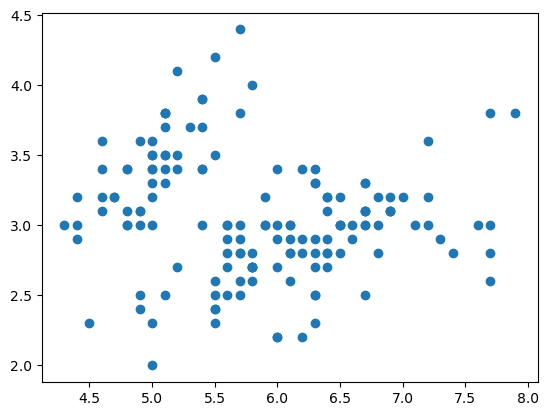

In [43]:
import matplotlib.pyplot as plt
#取其中两个维度，绘制原始数据散点分布图
plt.scatter(X["sepal length (cm)"], X["sepal width (cm)"])

## 获取k=3的聚类标签

In [44]:
#训练模型
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3) #构造聚类器
model.fit(X) #拟合我们的聚类模型
label_pred = model.labels_ #获取聚类标签
label_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

## 获取聚类中心

In [45]:
center = model.cluster_centers_  #获取聚类中心
center

array([[6.81276596, 3.07446809],
       [5.006     , 3.428     ],
       [5.77358491, 2.69245283]])

## 画出聚类图

In [46]:
#取出每个簇的样本
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
display(x0,x1,x2)

sepal length (cm)  sepal width (cm)
50                 7.0               3.2
51                 6.4               3.2
52                 6.9               3.1
54                 6.5               2.8
56                 6.3               3.3
58                 6.6               2.9
65                 6.7               3.1
74                 6.4               2.9
75                 6.6               3.0
76                 6.8               2.8
77                 6.7               3.0
86                 6.7               3.1
100                6.3               3.3
102                7.1               3.0
103                6.3               2.9
104                6.5               3.0
105                7.6               3.0
107                7.3               2.9
108                6.7               2.5
109                7.2               3.6
110                6.5               3.2
111                6.4               2.7
112                6.8               3.0
115                6.4               3.2
116                6.5               3.0
117                7.7               3.8
118                7.7               2.6
120                6.9               3.2
122                7.7               2.8
124                6.7               3.3
125                7.2               3.2
128                6.4               2.8
129                7.2               3.0
130                7.4               2.8
131                7.9               3.8
132                6.4               2.8
135                7.7               3.0
136                6.3               3.4
137                6.4               3.1
139                6.9               3.1
140                6.7               3.1
141                6.9               3.1
143                6.8               3.2
144                6.7               3.3
145                6.7               3.0
147                6.5               3.0
148                6.2               3.4

sepal length (cm)  sepal width (cm)
0                 5.1               3.5
1                 4.9               3.0
2                 4.7               3.2
3                 4.6               3.1
4                 5.0               3.6
5                 5.4               3.9
6                 4.6               3.4
7                 5.0               3.4
8                 4.4               2.9
9                 4.9               3.1
10                5.4               3.7
11                4.8               3.4
12                4.8               3.0
13                4.3               3.0
14                5.8               4.0
15                5.7               4.4
16                5.4               3.9
17                5.1               3.5
18                5.7               3.8
19                5.1               3.8
20                5.4               3.4
21                5.1               3.7
22                4.6               3.6
23                5.1               3.3
24                4.8               3.4
25                5.0               3.0
26                5.0               3.4
27                5.2               3.5
28                5.2               3.4
29                4.7               3.2
30                4.8               3.1
31                5.4               3.4
32                5.2               4.1
33                5.5               4.2
34                4.9               3.1
35                5.0               3.2
36                5.5               3.5
37                4.9               3.6
38                4.4               3.0
39                5.1               3.4
40                5.0               3.5
41                4.5               2.3
42                4.4               3.2
43                5.0               3.5
44                5.1               3.8
45                4.8               3.0
46                5.1               3.8
47                4.6               3.2
48                5.3               3.7
49                5.0               3.3

sepal length (cm)  sepal width (cm)
53                 5.5               2.3
55                 5.7               2.8
57                 4.9               2.4
59                 5.2               2.7
60                 5.0               2.0
61                 5.9               3.0
62                 6.0               2.2
63                 6.1               2.9
64                 5.6               2.9
66                 5.6               3.0
67                 5.8               2.7
68                 6.2               2.2
69                 5.6               2.5
70                 5.9               3.2
71                 6.1               2.8
72                 6.3               2.5
73                 6.1               2.8
78                 6.0               2.9
79                 5.7               2.6
80                 5.5               2.4
81                 5.5               2.4
82                 5.8               2.7
83                 6.0               2.7
84                 5.4               3.0
85                 6.0               3.4
87                 6.3               2.3
88                 5.6               3.0
89                 5.5               2.5
90                 5.5               2.6
91                 6.1               3.0
92                 5.8               2.6
93                 5.0               2.3
94                 5.6               2.7
95                 5.7               3.0
96                 5.7               2.9
97                 6.2               2.9
98                 5.1               2.5
99                 5.7               2.8
101                5.8               2.7
106                4.9               2.5
113                5.7               2.5
114                5.8               2.8
119                6.0               2.2
121                5.6               2.8
123                6.3               2.7
126                6.2               2.8
127                6.1               3.0
133                6.3               2.8
134                6.1               2.6
138                6.0               3.0
142                5.8               2.7
146                6.3               2.5
149                5.9               3.0

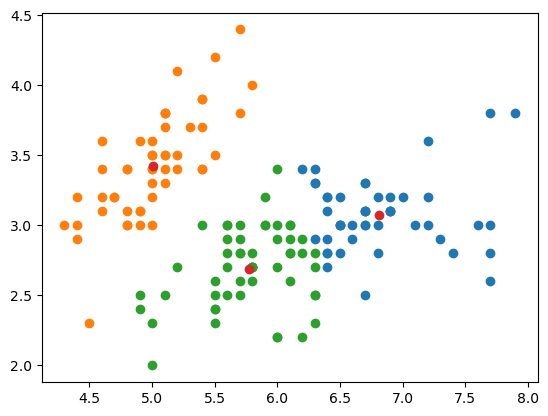

In [47]:
#分别绘出各个簇的样本
plt.scatter(x0["sepal length (cm)"], x0["sepal width (cm)"])
plt.scatter(x1["sepal length (cm)"], x1["sepal width (cm)"])
plt.scatter(x2["sepal length (cm)"], x2["sepal width (cm)"])
plt.scatter(center[:,0],center[:,1])

## 抽取代码改变K值

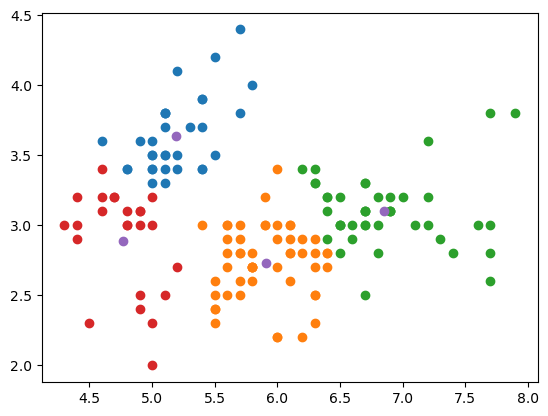

In [48]:
def draw(k):
    model = KMeans(n_clusters=k) #构造聚类器
    model.fit(X) #拟合我们的聚类模型
    label_pred = model.labels_ #获取聚类标签
    center = model.cluster_centers_  #获取聚类中心
    for i in range(0,k):
    #取出每个簇的样本
        x = X[label_pred == i]
        #分别绘出各个簇的样本
        plt.scatter(x["sepal length (cm)"], x["sepal width (cm)"])
    plt.scatter(center[:,0],center[:,1])
draw(4)

## 手肘法

- 误差平方和SSE：计算点到簇中心的距离平方和
- 畸变程度：所有簇的SSE之和，k越大，畸变程度一定越小
- 选择k值：画图找出畸变下降变缓的点

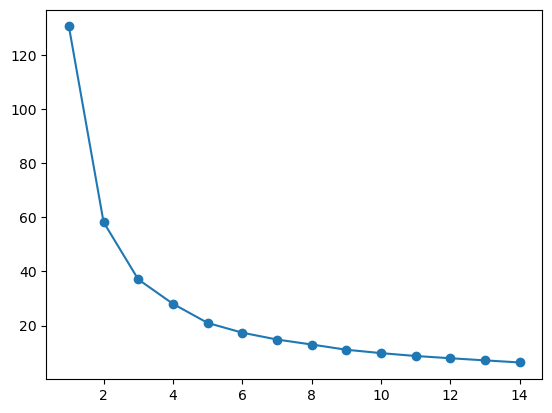

In [49]:
sse=[]
for k in range(1,15):
    model = KMeans(n_clusters=k) 
    model.fit(X)
    sse.append(model.inertia_)
plt.plot(range(1,15),sse,marker='o')

## 轮廓法

- 评价紧密与分散程度的指标
- 越大越好，可以取多个聚类数量，分别计算轮廓系数，取最大

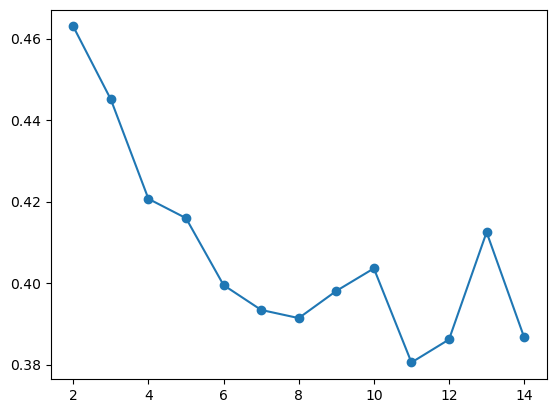

In [50]:
from sklearn.metrics import silhouette_score
score=[]
for k in range(2,15):
    model = KMeans(n_clusters=k) 
    model.fit(X)
    score.append(silhouette_score(X,model.labels_))
plt.plot(range(2,15),score,marker='o')

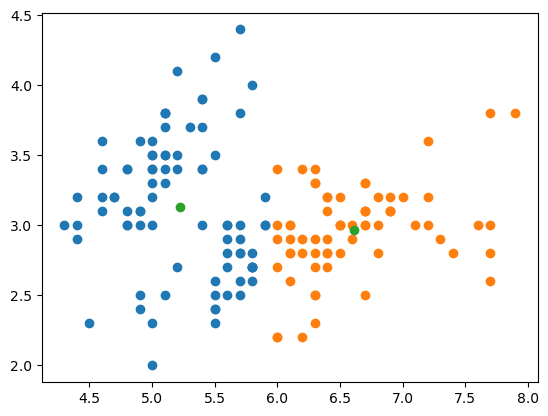

In [51]:
draw(2)

# 消费者聚类

## 确定K值

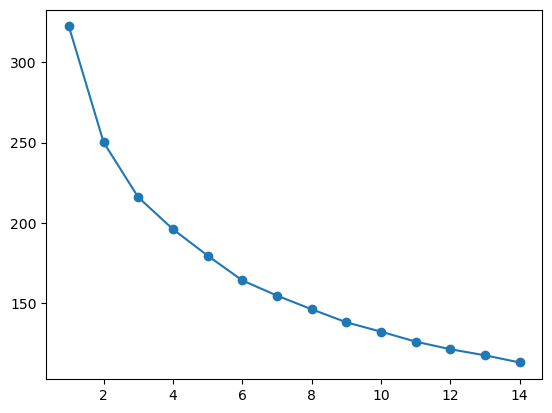

In [52]:
# 手肘法
sse=[]
for k in range(1,15):
    km=KMeans(n_clusters=k)
    km.fit(data_norm)
    sse.append(km.inertia_)
x=range(1,15)
y=sse
plt.plot(x,y,marker='o')

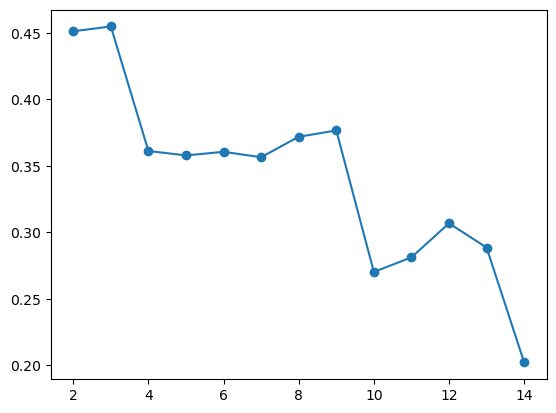

In [53]:
# 轮廓系数法
score=[]
for k in range(2,15):
    km=KMeans(n_clusters=k)
    res_km=km.fit(data_norm)
    score.append(silhouette_score(data_norm,res_km.labels_))
plt.plot(range(2,15),score,marker='o')

## 将聚类的结果放入原始数据

In [54]:
#确定K值为8
km=KMeans(n_clusters=8)
km.fit(data_norm)
print(km.labels_)

[4 4 4 ... 4 4 4]


In [55]:
# 把聚类的结果加入res1中。
res1['类别']=km.labels_
res1

买家会员名     收货地址  买家实际支付金额  宝贝种类  宝贝总数量  退款金额         价格  购买数量  missing  \
0         0      福建省     14.90   1.0    1.0   0.0   9.900000   1.0      0.0   
1         1       北京     37.56   4.0    8.0   0.0   4.957500   2.0      0.0   
2         2      吉林省     58.50   2.0   15.0   0.0   3.725000   7.5      0.0   
3         3      浙江省     13.39   2.0    2.0   0.0   4.520000   1.0      0.0   
4         4      江苏省     30.87   6.0    6.0   0.0   4.651667   1.0      0.0   
...     ...      ...       ...   ...    ...   ...        ...   ...      ...   
3421   3406      四川省     81.12   8.0   16.0   0.0   5.257500   2.0      0.0   
3422   3407     黑龙江省     21.69   2.0    2.0   0.0   9.245000   1.0      0.0   
3423   3408  广西壮族自治区     38.65   1.0    3.5   0.0  11.875000   3.5      0.0   
3424   3409      浙江省     36.00   4.0    4.0   0.0   8.812500   1.0      0.0   
3425   3410      四川省     30.01   5.0    5.0   0.0   5.510000   1.0      0.0   

      婴儿|  婴儿|幼儿|  婴儿|幼儿|学前|  婴儿|幼儿|学前|学生|  学前|学生|  幼儿|  幼儿|学前|  幼儿|学前|学生|  类别  
0     0.0     0.0        0.0           0.0     0.0  0.0     1.0        0.0   4  
1     0.0     0.0        0.0           0.0     0.0  0.0     1.0        3.0   4  
2     0.0     0.0        0.0           0.0     0.0  0.0     0.0        2.0   4  
3     0.0     0.0        0.0           0.0     0.0  0.0     0.0        2.0   4  
4     0.0     0.0        0.0           0.0     1.0  0.0     0.0        5.0   6  
...   ...     ...        ...           ...     ...  ...     ...        ...  ..  
3421  0.0     1.0        0.0           0.0     0.0  0.0     2.0        5.0   1  
3422  0.0     0.0        0.0           0.0     0.0  0.0     0.0        2.0   4  
3423  0.0     0.0        0.0           0.0     0.0  0.0     0.0        2.0   4  
3424  0.0     0.0        0.0           0.0     0.0  0.0     4.0        0.0   4  
3425  0.0     0.0        1.0           1.0     0.0  0.0     1.0        2.0   4  

[3426 rows x 18 columns]

In [56]:
cluster=res1[['买家会员名','类别']]
cluster.head()

买家会员名  类别
0      0   4
1      1   4
2      2   4
3      3   4
4      4   6

## 统计聚类类别-商品-购买次数

In [57]:
#将3个关键表数据进行关联
orders_items=pd.merge(orders,items,on='订单编号')
orders_items_attrs=pd.merge(orders_items,df_attr,on='标题')
orders_items_attrs.head()

订单编号  买家会员名  买家实际支付金额 收货地址  宝贝种类  宝贝总数量  退款金额  \
0  21407300627014900   1425     58.51  广东省     5     59     0   
1  24043728806509300    882    173.10  江苏省    38     46     0   
2  24043728806509300    882    173.10  江苏省    38     46     0   
3  20885882368182100    279     82.73  广东省     3    160     0   
4  20885882368182100    279     82.73  广东省     3    160     0   

                              标题  价格_x  购买数量          宝贝ID  价格_y  玩具类型  \
0  发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家  0.58    12  530449665002  0.58  其它玩具   
1  发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家  0.58     1  530449665002  0.58  其它玩具   
2  发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家  0.68     1  530449665002  0.58  其它玩具   
3  发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家  0.68    50  530449665002  0.58  其它玩具   
4  发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家  0.58    50  530449665002  0.58  其它玩具   

                       适用年龄  品牌  
0  3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁   3  
1  3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁   3  
2  3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁   3  
3  3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁   3  
4  3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁   3

In [58]:
#抽取买家和宝贝
user_item=orders_items_attrs.loc[:,['买家会员名','宝贝ID']]
user_item['购买次数']=0
user_item.head()

买家会员名          宝贝ID  购买次数
0   1425  530449665002     0
1    882  530449665002     0
2    882  530449665002     0
3    279  530449665002     0
4    279  530449665002     0

In [59]:
#计算购买次数
user_item_freq=user_item.groupby(['买家会员名','宝贝ID']).count().reset_index()
user_item_freq.head()

买家会员名          宝贝ID  购买次数
0      0   42577833473     1
1      1  536728628605     1
2      1  545516801138     1
3      1  547644315780     1
4      1  550735773284     1

In [60]:
# 消费者匹配类别：消费者-物品-喜好度-消费者所属类别
user_item_freq_cluster=pd.merge(user_item_freq,cluster,on='买家会员名')
user_item_freq_cluster.head()

买家会员名          宝贝ID  购买次数  类别
0      0   42577833473     1   4
1      1  536728628605     1   4
2      1  545516801138     1   4
3      1  547644315780     1   4
4      1  550735773284     1   4

In [62]:
#同一类群对每一个物品的平均购买次数：类别-物品-平均购买次数
cluster_item_freq=user_item_freq_cluster[['宝贝ID','购买次数','类别']].groupby(['类别','宝贝ID']).mean().reset_index()
cluster_item_freq

类别          宝贝ID     购买次数
0      0   36074765406  1.00000
1      0   36286235128  1.00000
2      0   36353085367  1.00000
3      0   40400203213  1.26087
4      0   40415550893  1.00000
...   ..           ...      ...
1573   7  550997388851  1.00000
1574   7  551079722431  1.00000
1575   7  551091071810  1.00000
1576   7  551715398940  1.00000
1577   7  552028581381  1.00000

[1578 rows x 3 columns]

## 消费者没有购买过的商品

In [63]:
user_item_freq.head()

买家会员名          宝贝ID  购买次数
0      0   42577833473     1
1      1  536728628605     1
2      1  545516801138     1
3      1  547644315780     1
4      1  550735773284     1

In [64]:
#创建数据透视表
user_item_all=user_item_freq.pivot_table(index='买家会员名',columns='宝贝ID',values='购买次数').fillna(0)
user_item_all.head()

宝贝ID   35721027449   35721723963   35722000205   35722333869   35722423659   \
买家会员名                                                                         
0               0.0           0.0           0.0           0.0           0.0   
1               0.0           0.0           0.0           0.0           0.0   
2               0.0           0.0           0.0           0.0           0.0   
3               0.0           0.0           0.0           0.0           0.0   
4               0.0           0.0           0.0           1.0           0.0   

宝贝ID   35750823403   35753244214   35754637865   35797606083   35798309577   \
买家会员名                                                                         
0               0.0           0.0           0.0           0.0           0.0   
1               0.0           0.0           0.0           0.0           0.0   
2               0.0           0.0           0.0           0.0           0.0   
3               0.0           0.0           0.0           0.0           0.0   
4               0.0           0.0           0.0           0.0           0.0   

宝贝ID   ...  551081926272  551091071810  551091439907  551135995408  \
买家会员名  ...                                                           
0      ...           0.0           0.0           0.0           0.0   
1      ...           0.0           0.0           0.0           0.0   
2      ...           0.0           0.0           0.0           0.0   
3      ...           0.0           0.0           0.0           0.0   
4      ...           0.0           0.0           0.0           0.0   

宝贝ID   551248890640  551625132527  551675713112  551715398940  552007245556  \
买家会员名                                                                         
0               0.0           0.0           0.0           0.0           0.0   
1               0.0           0.0           0.0           0.0           0.0   
2               0.0           0.0           0.0           0.0           0.0   
3               0.0           0.0           0.0           0.0           0.0   
4               0.0           0.0           0.0           0.0           0.0   

宝贝ID   552028581381  
买家会员名                
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  

[5 rows x 269 columns]

In [65]:
#将数据转置为会员名-商品-购买次数
user_item_res=user_item_all.stack().reset_index()
user_item_res.head()

买家会员名         宝贝ID    0
0      0  35721027449  0.0
1      0  35721723963  0.0
2      0  35722000205  0.0
3      0  35722333869  0.0
4      0  35722423659  0.0

In [66]:
#重命名列
user_item_res.rename(columns={0:'购买次数'},inplace=True)
user_item_res.head()

买家会员名         宝贝ID  购买次数
0      0  35721027449   0.0
1      0  35721723963   0.0
2      0  35722000205   0.0
3      0  35722333869   0.0
4      0  35722423659   0.0

In [67]:
#筛选用户未购买的商品
user_item_notbuy=user_item_res[user_item_res.购买次数==0]
user_item_notbuy.drop('购买次数',axis=1,inplace=True)
user_item_notbuy.head()

买家会员名         宝贝ID
0      0  35721027449
1      0  35721723963
2      0  35722000205
3      0  35722333869
4      0  35722423659

## 进行商品推荐

In [68]:
# 消费者匹配类别，得到新的表“消费者-未购买过的商品-消费者所属类别”
user_item_notbuy_cluster=pd.merge(user_item_notbuy,cluster,on='买家会员名')
user_item_notbuy_cluster.head()

买家会员名         宝贝ID  类别
0      0  35721027449   4
1      0  35721723963   4
2      0  35722000205   4
3      0  35722333869   4
4      0  35722423659   4

In [69]:
# 找到没有购买过的商品，在所属类群中的购买次数是多少
user_item_cluster_freq=pd.merge(user_item_notbuy_cluster,cluster_item_freq,how='left',on=['宝贝ID','类别']).fillna(0)
user_item_cluster_freq.head()

买家会员名         宝贝ID  类别      购买次数
0      0  35721027449   4  1.000000
1      0  35721723963   4  1.029412
2      0  35722000205   4  1.458015
3      0  35722333869   4  1.153846
4      0  35722423659   4  1.000000

In [70]:
# 按照类别中的喜好度进行降序排序，并推荐topK个你没有购买过的，但类群中却十分流行的商品
K=3
topK=user_item_cluster_freq.groupby('买家会员名').apply(lambda group:group.sort_values('购买次数',ascending=False)[:K])
topK
# 是对以下代码的简写
# def get_topK(group,K):
#     rec=group.sort_values('购买次数',ascending=False)[:K]
#     return rec
# topK=user_item_cluster_freq.groupby('买家会员名').apply(get_topK,K=10)
# print(topK.head())

买家会员名          宝贝ID  类别      购买次数
买家会员名                                          
0     239         0  549882564050   4  2.888889
      119         0  538585695146   4  2.833333
      176         0  544016559367   4  2.636364
1     505         1  549882564050   4  2.888889
      387         1  538585695146   4  2.833333
...             ...           ...  ..       ...
3409  880049   3409  538585695146   4  2.833333
      880106   3409  544016559367   4  2.636364
3410  880434   3410  549882564050   4  2.888889
      880316   3410  538585695146   4  2.833333
      880373   3410  544016559367   4  2.636364

[9954 rows x 4 columns]

In [71]:
#删除多重索引中的第二个索引
topK.index=topK.index.droplevel(1)
topK

买家会员名          宝贝ID  类别      购买次数
买家会员名                                   
0          0  549882564050   4  2.888889
0          0  538585695146   4  2.833333
0          0  544016559367   4  2.636364
1          1  549882564050   4  2.888889
1          1  538585695146   4  2.833333
...      ...           ...  ..       ...
3409    3409  538585695146   4  2.833333
3409    3409  544016559367   4  2.636364
3410    3410  549882564050   4  2.888889
3410    3410  538585695146   4  2.833333
3410    3410  544016559367   4  2.636364

[9954 rows x 4 columns]